In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat

In [2]:
#defined file path
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
#everything in file
df=pd.read_csv(url)
#Without header
dfwh=pd.read_csv(url,header= None )
#add headers in list
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels",
         "engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders",
         "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]


In [3]:
#assign list of header as data frame column names
dfwh.columns=headers
#prints dataframe attributes data types in series
print(dfwh.dtypes)
#Statistical analysis of data distribution
print(dfwh.describe())
#for all attributes including non numeric
print(dfwh.describe(include="all"))
#It describes top to and bottom 30 rows each for sample
print(dfwh.info)
print(dfwh)

dfwh["price"].replace("?","0",inplace=True)
dfwh["price"]=pd.to_numeric(dfwh["price"])
dfwh["horsepower"].replace("?","0",inplace=True)
dfwh["horsepower"]=pd.to_numeric(dfwh["horsepower"])

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object
        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.02

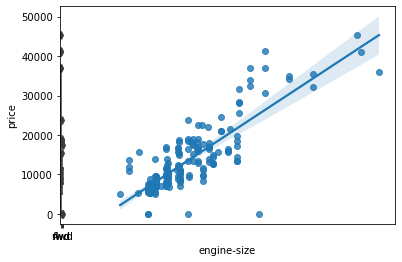

In [4]:
#boxplots
sb.boxplot(x="drive-wheels",y="price",data=dfwh)
#scatterplto
sb.regplot(x="engine-size", y="price", data=dfwh)

In [5]:
#Grouping of data and visualizationa as table
dftmp=dfwh[['body-style','drive-wheels','price']]
df_grp=dftmp.groupby(['drive-wheels','body-style'],as_index=False).mean()
print(df_grp)

#Grouping of data and visualizationa as pivot table
df_pivot=df_grp.pivot(index='drive-wheels',columns='body-style')
print(df_pivot)

   drive-wheels   body-style         price
0           4wd    hatchback   3801.500000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9467.526316
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  13583.157895
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222
                   price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.15

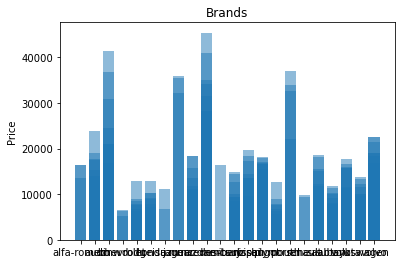

ANOVA results: F= 64.28440184196305 , P = 2.4833608991365896e-22
ANOVA results: F= 122.70383417024505 , P = 2.0574853192713905e-22


In [6]:
#ANOVA
plt.bar(dfwh["make"],dfwh["price"], align='center', alpha=0.5)
plt.ylabel('Price')
plt.title('Brands')
plt.ion()
plt.show()

grouped_test2=dftmp[['drive-wheels','price']].groupby(['drive-wheels'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   
f_val, p_val = stat.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val )


In [7]:
#Pearson coefficient
pearson_coef, p_value = stat.pearsonr(dfwh['horsepower'], dfwh['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

print("This is correlation")
print(dfwh.corr())

The Pearson Correlation Coefficient is 0.6912878787942789  with a P-value of P = 1.8175735366187697e-30
This is correlation
                   symboling  wheel-base    length     width    height  \
symboling           1.000000   -0.531954 -0.357612 -0.232919 -0.541038   
wheel-base         -0.531954    1.000000  0.874587  0.795144  0.589435   
length             -0.357612    0.874587  1.000000  0.841118  0.491029   
width              -0.232919    0.795144  0.841118  1.000000  0.279210   
height             -0.541038    0.589435  0.491029  0.279210  1.000000   
curb-weight        -0.227691    0.776386  0.877728  0.867032  0.295572   
engine-size        -0.105790    0.569329  0.683360  0.735433  0.067149   
compression-ratio  -0.178515    0.249786  0.158414  0.181129  0.261214   
horsepower          0.065759    0.351681  0.526253  0.614047 -0.097632   
city-mpg           -0.035823   -0.470414 -0.670909 -0.642704 -0.048640   
highway-mpg         0.034606   -0.544082 -0.704662 -0.677218 -